# **<span style="font-family: 'Palatino Linotype', serif;">📉🤯📚 A curva de aprendiado</span>**
----
*<span style="font-family: 'Angilla Tattoo'"> “Nem toda magia é feita de feitiços — algumas são compiladas linha por linha, na curva de aprendizado entre penas e códigos.” 🦆✨📈</span>*

<div align="center">
    <img src = "Maga curva.png" alt = "Maga curva aprendizado" width = 250>
</div>

----
 **Objetivo:** Nesse notebook, irei implementar o registro da curva de aprendizado dos dados de treino e de validação do código nas redes neurais feita em python puro em sala de aula.
 
---

In [198]:
from rede_neural import Valor, Neuronio, Camada, MLP
import matplotlib.pyplot as plt
import numpy as np 

Primeiro, definimos os valores de x e y reais, que serão os valores medidos experimentalmente. Desejamos que nossa MLP realize a predição de bons valores de y com base nos valores iniciais x. No nosso caso, os valores de x e y não equivalem a uma medida real.


In [199]:
np.random.seed(2345)  
x = np.random.rand(5, 5)  
print(x)


[[0.66064431 0.41360065 0.66810256 0.22994342 0.80767834]
 [0.63681846 0.17219385 0.26038587 0.91531999 0.46281551]
 [0.12019095 0.88088551 0.22621895 0.81144033 0.44587892]
 [0.09945494 0.89445394 0.63963019 0.93079198 0.8535982 ]
 [0.84183989 0.55101815 0.2090729  0.87289664 0.87130821]]


In [200]:
np.random.seed(5432)
y_real = np.random.rand(1, 5)
print(y_real)

[[0.48682936 0.43688192 0.95714374 0.71006036 0.48540221]]


In [201]:
y_real = y_real.T
print(y_real)

[[0.48682936]
 [0.43688192]
 [0.95714374]
 [0.71006036]
 [0.48540221]]


In [202]:
indices = np.arange(x.shape[0])
np.random.shuffle(indices)

TAMANHO_TREINO = 0.1
TAMANHO_TESTE = 0.1

n_total = x.shape[0]
n_treino = max(1, int(n_total * TAMANHO_TREINO))
n_teste = max(1, int(n_total * TAMANHO_TESTE))
n_val = n_total - n_treino - n_teste

if n_treino + n_teste + n_val > n_total:
    n_val = n_total - n_treino - n_teste

# nessa linha, o código separa os índices dos daods que serão utilizados para treino, teste e validação
idx_treino = indices[:n_treino]
idx_teste = indices[n_treino:n_treino + n_teste]
idx_val = indices[n_treino + n_teste:]


# nessa linha, ele pega os dados de cada índice
x_treino = x[idx_treino]
y_treino = y_real[idx_treino]

x_teste = x[idx_teste]
y_teste = y_real[idx_teste]

x_val = x[idx_val]
y_val = y_real[idx_val]

print("x_treino:\n", x_treino)
print("x_teste:\n", x_teste)
print("x_validação:\n", x_val)

x_treino:
 [[0.66064431 0.41360065 0.66810256 0.22994342 0.80767834]]
x_teste:
 [[0.84183989 0.55101815 0.2090729  0.87289664 0.87130821]]
x_validação:
 [[0.63681846 0.17219385 0.26038587 0.91531999 0.46281551]
 [0.12019095 0.88088551 0.22621895 0.81144033 0.44587892]
 [0.09945494 0.89445394 0.63963019 0.93079198 0.8535982 ]]


Agora, definimos os parâmetros da nossa MLP, que são a quantidade de dados de entrada e a quantidade de neurônios por camada.


In [203]:
NUM_DADOS_DE_ENTRADA = 5
NUM_DADOS_DE_SAIDA = 1 
CAMADAS_OCULTAS = [3, 2] 

arquitetura_da_rede = CAMADAS_OCULTAS + [NUM_DADOS_DE_SAIDA]

minha_mlp = MLP(NUM_DADOS_DE_ENTRADA, arquitetura_da_rede)

Agora, vamos treinar a nossa rede! Para isso, definimos quantas épocas e qual será a taxa de aprendizado da rede, ou seja, quantas vezes ela será treinada e o quanto irá aprender em cada treino. Nesse código, a MLP prevê um valor de y, calcula o RMSE em relação ao valor real definido anteriormente, zera o gradiente local da função, realiza o backpropagation e então, atualiza os parâmetros da rede visando diminuir o erro.

In [204]:
NUM_EPOCAS = 100
TAXA_DE_APRENDIZADO = 0.05
historico_loss_treino = []
historico_loss_val = []

for epoca in range(NUM_EPOCAS):
    # treinando
    y_pred_treino = []
    for exemplo in x_treino:
        previsao = minha_mlp(exemplo)
        y_pred_treino.append(previsao)

    # loss do treino
    erros_treino = []
    for yt, yp in zip(y_real, y_pred_treino):
        residuo = yp - yt
        erro_quadratico = residuo ** 2
        erros_treino.append(erro_quadratico)        
    loss_treino = sum(erros_treino)
    historico_loss_treino.append(loss_treino.data)

    # zero grad
    for p in minha_mlp.parametros():
        p.grad = 0

    # backpropagation
    loss_treino.propagar_tudo()

    # atualiza parâmetros
    for p in minha_mlp.parametros():
        p.data = p.data - p.grad * TAXA_DE_APRENDIZADO
    
    y_pred_val = []
    # validação
    for exemplo in x_val:
        previsao = minha_mlp(exemplo)
        y_pred_val.append(previsao)

    # loss da validação
    erros_val = []
    for yv, yp in zip(y_val, y_pred_val):
        residuo = yp - yv
        erro_quadratico = residuo ** 2
        erros_val.append(erro_quadratico)

    loss_val = sum(erros_val)
    historico_loss_val.append(loss_val.data)


    # mostra resultado (opcional)
    print("A perda do treino é", loss_treino.data, "A perda da validação é", loss_val.data)

A perda do treino é [0.01162219] A perda da validação é [0.43810753]
A perda do treino é [0.01141907] A perda da validação é [0.43627791]
A perda do treino é [0.01121906] A perda da validação é [0.43446593]
A perda do treino é [0.01102213] A perda da validação é [0.4326715]
A perda do treino é [0.01082824] A perda da validação é [0.43089451]
A perda do treino é [0.01063737] A perda da validação é [0.42913485]
A perda do treino é [0.01044947] A perda da validação é [0.42739242]
A perda do treino é [0.01026451] A perda da validação é [0.42566711]
A perda do treino é [0.01008246] A perda da validação é [0.42395882]
A perda do treino é [0.00990328] A perda da validação é [0.42226743]
A perda do treino é [0.00972695] A perda da validação é [0.42059283]
A perda do treino é [0.00955342] A perda da validação é [0.41893492]
A perda do treino é [0.00938266] A perda da validação é [0.41729357]
A perda do treino é [0.00921464] A perda da validação é [0.41566867]
A perda do treino é [0.00904932] A 

 [0.00445308] A perda da validação é [0.36385483]
A perda do treino é [0.00436872] A perda da validação é [0.36278952]
A perda do treino é [0.00428587] A perda da validação é [0.36173575]
A perda do treino é [0.00420451] A perda da validação é [0.36069339]
A perda do treino é [0.00412461] A perda da validação é [0.35966235]
A perda do treino é [0.00404616] A perda da validação é [0.3586425]
A perda do treino é [0.00396912] A perda da validação é [0.35763374]
A perda do treino é [0.00389348] A perda da validação é [0.35663595]
A perda do treino é [0.00381921] A perda da validação é [0.35564902]
A perda do treino é [0.00374629] A perda da validação é [0.35467284]
A perda do treino é [0.00367469] A perda da validação é [0.3537073]
A perda do treino é [0.0036044] A perda da validação é [0.3527523]
A perda do treino é [0.0035354] A perda da validação é [0.35180772]
A perda do treino é [0.00346766] A perda da validação é [0.35087345]
A perda do treino é [0.00340115] A perda da validação é [0

Agora, partimos para o nosso desafio: calcular a curva de aprendizado dos dados de treino! No código anteriror, armazenamos na lista "historico_loss" os valores das perdas ao longo de cada época, vamos plotar!

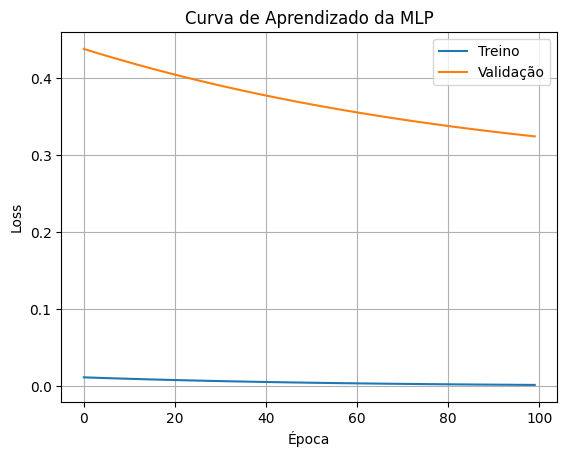

In [205]:
plt.plot(historico_loss_treino, label = "Treino")
plt.plot(historico_loss_val, label = "Validação")
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Curva de Aprendizado da MLP')
plt.legend()
plt.grid(True)
plt.show()

-----

### 📊 Conclusão:

Nesse notebook, exploramos o funcionamento da taxa de aprendizado para diferentes conjuntos de dado. Nesse caso, utilizamos 10% dos dados para realizar teste e 80% dos dados para as validações. Foi possível observar que os dados de validação iniciam com uma loss maior e tem uma queda significativa ao longo do treino, enquanto os dados de teste começãm com uma loss baixa e caem em taxas menores ao longo do treinamento. Isso provavelmente ocorre devido a diferença do número de dados selecionados.

----
### 📚 Referências:
DEEP LEARNING BOOK. O efeito da taxa de aprendizagem no treinamento de redes neurais artificiais. Disponível em: <https://www.deeplearningbook.com.br/o-efeito-da-taxa-de-aprendizagem-no-treinamento-de-redes-neurais-artificiais/>. Acesso em: 18 abr. 2025.

OPENAI. ChatGPT (versão GPT-4) [programa de computador]. Disponível em: <https://chat.openai.com/>. Acesso em: 18 abr. 2025.